In [1]:
# Complete Case Analysis(CCA)
# This is a quite straightforward method of handling the Missing Data, which directly removes the rows that have missing data i.e we consider only those rows where we have complete
# directly removes the rows that have missing data i.e we consider only those rows where we have complete data i.e data is not missing.
# Assumptions:-
#       ◦ Data is Missing At Random(MAR).
#       ◦ Missing data is completely removed from the table.
# Advantages:- 
#        ◦ Easy to implement.
#        ◦ No Data manipulation required.
# Limitations:-
#        ◦ Deleted data can be informative.
#        ◦ Can lead to the deletion of a large part of the data.
#        ◦ Can create a bias in the dataset, if a large amount of a particular type of variable is deleted from it.
#        ◦ The production model will not know what to do with Missing data.
# When to Use:-
#        ◦ Data is MAR(Missing At Random).
#        ◦ Good for Mixed, Numerical, and Categorical data.
#        ◦ Missing data is not more than 5% – 6% of the dataset.

#### Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Data Set

In [3]:
df = pd.read_csv(r"C:\Users\Mr.MACHINE\Videos\Captures\DATA SCIENCE\PRACTICE\Data PreProcessing\3.Handling Missing Value\WineQuality.csv")

#### Display First 5 records of data

In [4]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Let's check Data set info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


#### Checking The Null Values and CalculateTotal Nullvalues of Dataset

In [6]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

#### Cheking Shape of the Dataset.  i.e. how many rows and Column in a Dataset.

In [7]:
df.shape

(6497, 13)

#### Calculate the Percentage of Null Values.

In [8]:
df.isnull().sum()/df.shape[0]*100

type                    0.000000
fixed acidity           0.153917
volatile acidity        0.123134
citric acid             0.046175
residual sugar          0.030783
chlorides               0.030783
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.138525
sulphates               0.061567
alcohol                 0.000000
quality                 0.000000
dtype: float64

#### Here the NaN missing Values percentages are very low.
#### We can drop if the percentage of missing value is 5-6% 

In [9]:
df1 = df.dropna(axis=0)

In [10]:
df1.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Shape of the Data Set After Removing Null Values

In [11]:
df1.shape

(6463, 13)

#### Calculating the Standard Deviation Before and After imputation

In [12]:
df['volatile acidity'].std()

0.16464902864429293

In [13]:
df1['volatile acidity'].std()

0.16463923980300144

##### let's check the distribution of a few variables before and after 
#### cca: histogram

<AxesSubplot:>

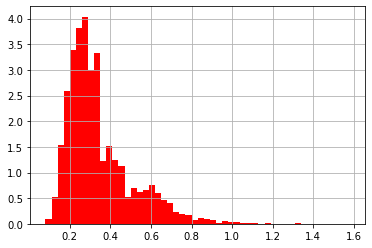

In [14]:
# original data

fig = plt.figure()
ax = fig.add_subplot(111)
df['volatile acidity'].hist(bins=50, ax=ax, density=True, color='red')

<AxesSubplot:>

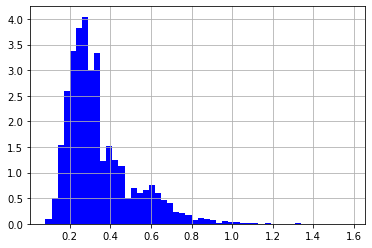

In [15]:
# data after cca

fig = plt.figure()
ax = fig.add_subplot(111)
df1['volatile acidity'].hist(bins=50, ax=ax, density=True, color='blue')

<AxesSubplot:ylabel='Density'>

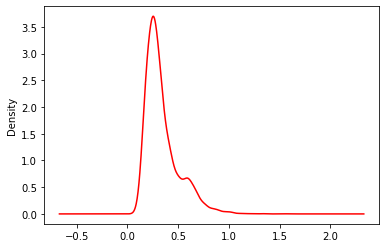

In [16]:
## let's check the distribution of a few variables before and after 
# cca: density plot

# original data
fig = plt.figure()
ax = fig.add_subplot(111)
df['volatile acidity'].plot.density(color = 'red')

<AxesSubplot:ylabel='Density'>

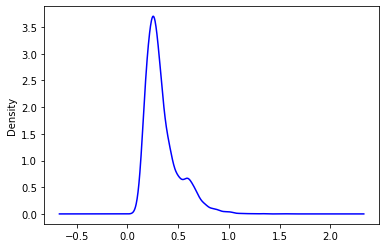

In [17]:
# data after cca

df1['volatile acidity'].plot.density(color='blue')

#### Note: There is no major Difference before and after drop the missing Value.